## Data Preprocessing

In [34]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import tensorflow as tf


#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


 ## Drop Unnecessary Columns

In [35]:
# Drop EIN and NAME columns
application_df = application_df.drop(columns=["EIN", "NAME"])


In [36]:
# Print DataFrame
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


### Identify Categorical Variables and Group Rare Categories

In [37]:
# Group rare values in 'APPLICATION_TYPE'
application_counts = application_df['APPLICATION_TYPE'].value_counts()
cutoff = 500  # Example cutoff value
application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].apply(
    lambda x: x if application_counts[x] >= cutoff else 'Other'
)

# Group rare values in 'CLASSIFICATION'
classification_counts = application_df['CLASSIFICATION'].value_counts()
cutoff = 1000  # Example cutoff value
application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].apply(
    lambda x: x if classification_counts[x] >= cutoff else 'Other'
)

# Check the result of grouping
print(application_df['APPLICATION_TYPE'].value_counts())
print(application_df['CLASSIFICATION'].value_counts())


APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64
CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64


### One-Hot Encode Categorical Variables

In [38]:
# Use pd.get_dummies() to encode categorical variables
encoded_df = pd.get_dummies(application_df)

# Display the first few rows to verify encoding
encoded_df.head()


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False


### Split the Data into Features and Target Arrays

In [39]:
# Separate the target (IS_SUCCESSFUL) from the features
X = encoded_df.drop(columns=["IS_SUCCESSFUL"]).values
y = encoded_df["IS_SUCCESSFUL"].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Scale the Feature Data

In [40]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler on the training data
scaler.fit(X_train)

# Scale the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirm the scaling worked by checking the shape of the scaled data
print(f"Scaled Training Features Shape: {X_train_scaled.shape}")
print(f"Scaled Testing Features Shape: {X_test_scaled.shape}")


Scaled Training Features Shape: (27439, 43)
Scaled Testing Features Shape: (6860, 43)


## Build, Compile, and Train the Model

###  Build the Initial Neural Network Model

In [41]:
# Define the neural network model
model = tf.keras.models.Sequential()

# First hidden layer with ReLU activation
model.add(tf.keras.layers.Dense(units=80, input_dim=X_train.shape[1], activation='relu'))

# Second hidden layer with ReLU activation
model.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer with sigmoid activation for binary classification
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 80)                  │           3,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 30)                  │           2,430 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,981 (23.36 KB)

 Trainable params: 5,981 (23.36 KB)

 Non-trainable params: 0 (0.00 B)

###  Compile and Train the Model

In [42]:
# Compile the optimized model
model.compile(optimizer='adam',
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train,
                 epochs=100,
                 batch_size=32,
                 validation_split=0.2)

Epoch 1/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6905 - loss: 0.5996 - val_accuracy: 0.7378 - val_loss: 0.5508
Epoch 2/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7205 - loss: 0.5630 - val_accuracy: 0.7382 - val_loss: 0.5452
Epoch 3/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7273 - loss: 0.5582 - val_accuracy: 0.7360 - val_loss: 0.5480
Epoch 4/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7302 - loss: 0.5495 - val_accuracy: 0.7371 - val_loss: 0.5490
Epoch 5/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7269 - loss: 0.5534 - val_accuracy: 0.7374 - val_loss: 0.5460
Epoch 6/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7334 - loss: 0.5494 - val_accuracy: 0.7301 - val_loss: 0.5512
Epoch 7/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7353 - loss: 0.5463 - val_accuracy: 0.7378 - val_loss: 0.5450
Epoch 8/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7335 - loss: 0.5462 - val_accu

### Evaluate model using Test or Model

In [43]:
import numpy as np
# Assuming you have your scaler from the training phase
# (e.g., StandardScaler, MinMaxScaler)
# If not, you need to load or recreate it

# Apply the SAME scaling to X_test as you did to X_train
X_test_scaled = scaler.transform(X_test)

# Now evaluate the model with the scaled test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)

# Print the results using the correct variable names
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

215/215 - 0s - 1ms/step - accuracy: 0.7267 - loss: 0.5673
Test Loss: 0.5672920346260071, Test Accuracy: 0.7266764044761658


In [44]:
# Now 'model' is compiled, and this line should work
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test)

# ... rest of your code in ipython-input-84-f9a8c0ffa921 ...

215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7248 - loss: 0.5664


In [45]:
# Export the trained model to an HDF5 file
nn = model # Define nn = model
nn.save('AlphabetSoupCharity.h5')


## Optimize the Model

### Build an Optimized Neural Network Model

In [46]:
# Define the optimized neural network model
optimized_model = tf.keras.models.Sequential()

# First hidden layer with more neurons and ReLU activation
optimized_model.add(tf.keras.layers.Dense(units=100, input_dim=X_train.shape[1], activation='relu'))

# Second hidden layer with more neurons and ReLU activation
optimized_model.add(tf.keras.layers.Dense(units=50, activation='relu'))

# Third hidden layer to improve learning
optimized_model.add(tf.keras.layers.Dense(units=25, activation='relu'))

# Output layer with sigmoid activation for binary classification
optimized_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the optimized model structure
optimized_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 100)                 │           4,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,751 (42.00 KB)

 Trainable params: 10,751 (42.00 KB)

 Non-trainable params: 0 (0.00 B)

### Compile and Train Optimized Model

In [47]:
# Compile the optimized model
optimized_model.compile(optimizer='adam',
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

# Train the optimized model
history = optimized_model.fit(X_train_scaled, y_train,
                 epochs=150,
                 batch_size=32,
                 validation_split=0.2)

Epoch 1/150
686/686 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7050 - loss: 0.5896 - val_accuracy: 0.7365 - val_loss: 0.5495
Epoch 2/150
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7327 - loss: 0.5521 - val_accuracy: 0.7389 - val_loss: 0.5512
Epoch 3/150
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7263 - loss: 0.5565 - val_accuracy: 0.7358 - val_loss: 0.5500
Epoch 4/150
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7303 - loss: 0.5481 - val_accuracy: 0.7383 - val_loss: 0.5464
Epoch 5/150
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7316 - loss: 0.5483 - val_accuracy: 0.7358 - val_loss: 0.5460
Epoch 6/150
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7279 - loss: 0.5506 - val_accuracy: 0.7409 - val_loss: 0.5461
Epoch 7/150
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7312 - loss: 0.5504 - val_accuracy: 0.7380 - val_loss: 0.5470
Epoch 8/150
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7266 - loss: 0.5492 - val_accu

## Evaluate the Optimized Model

In [48]:
# Evaluate the optimized model on the scaled test data
test_loss, test_accuracy = optimized_model.evaluate(X_test_scaled, y_test, verbose=2)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


215/215 - 0s - 2ms/step - accuracy: 0.7262 - loss: 0.6027
Test Loss: 0.6026937365531921, Test Accuracy: 0.7262390851974487


## Optional: Plot the Training History

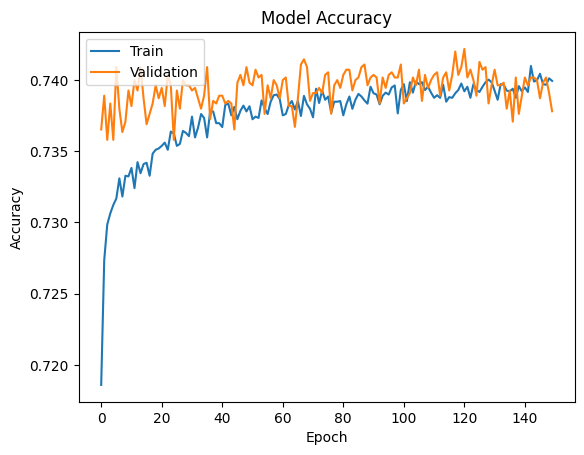

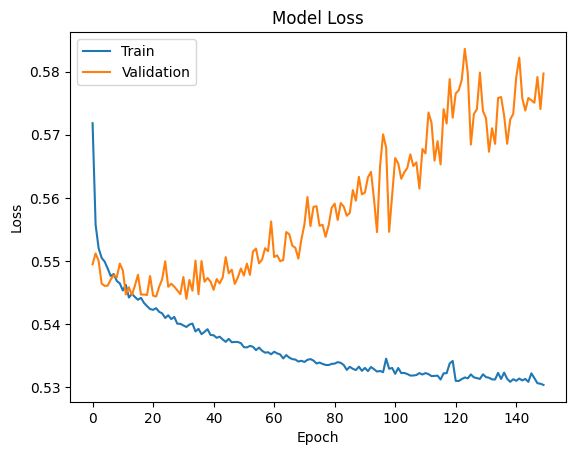

In [49]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


### Save the Optimized Model

In [50]:
# Save the optimized model to an HDF5 file
optimized_model.save("AlphabetSoupCharity_Optimization.h5")
